In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
#importing all csvs
dfs = [pd.read_csv(f'data/dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1' ]]

#adding decade column
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    dfs[i]['decade'] = pd.Series(decade, index=dfs[i].index)

#combining everything in one df
df = pd.concat(dfs, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

df.sample(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
27966,One Has My Name (The Other Has My Heart),Barry Young,spotify:track:3Vd7lnnD4xihfGIgqNDo9B,0.514,0.403,9,-14.822,1,0.0295,0.770000,0.000011,0.2320,0.653,112.532,155627,4,21.85376,7,1,1960
16066,Hooked,Dylan Scott,spotify:track:3DV49ruvI5Sl6iisPZAc2c,0.597,0.721,9,-6.422,1,0.0356,0.036200,0.000000,0.0832,0.437,132.054,149293,4,23.40072,7,1,2010
26983,Lost,Beautiful Sin,spotify:track:2DIAdMEOfWT8LDfCjBBdGb,0.372,0.922,7,-3.534,1,0.0485,0.000156,0.000360,0.2600,0.361,90.039,291760,4,21.29234,15,0,2000
20996,Bobo's Lament,Francis Lai,spotify:track:0D5xR7GBtioF8za610pk6j,0.363,0.238,11,-12.991,0,0.0325,0.622000,0.880000,0.1270,0.264,104.595,220839,4,26.66242,14,0,1960
33054,Art House Director,Broken Social Scene,spotify:track:5feuZknKlJYGMPvWvKrpwt,0.464,0.766,7,-5.298,1,0.0410,0.000122,0.027500,0.5440,0.335,130.458,212173,5,105.47915,6,0,2010


In [3]:
print(
    df.shape,
df.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [4]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000,1982.775264
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006,17.491234
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000,1960.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000,1970.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000,1980.000000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000,2000.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000,2010.000000


In [5]:
df.value_counts('target')

target
0    20553
1    20553
dtype: int64

<AxesSubplot:>

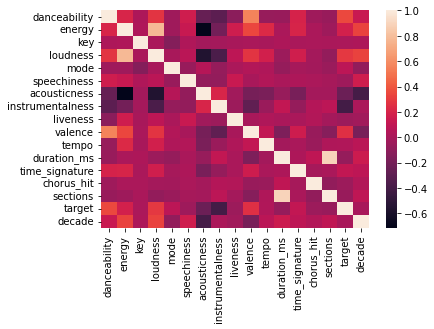

In [6]:
#let's check the correlation
sns.heatmap(df.corr())

In [7]:
# defining columns with numeric types 
num_cols = [ col for col in df.columns if df[col].dtypes != "O"]
num_cols

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'chorus_hit',
 'sections',
 'target',
 'decade']

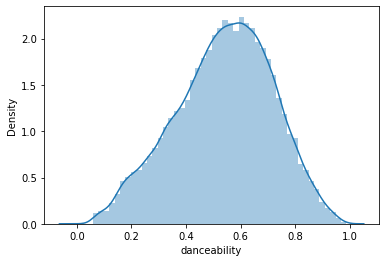

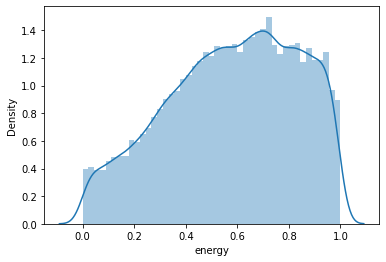

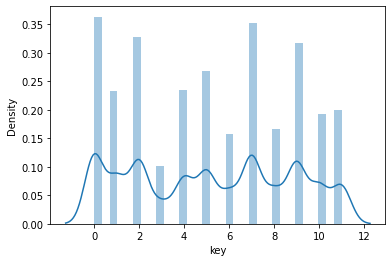

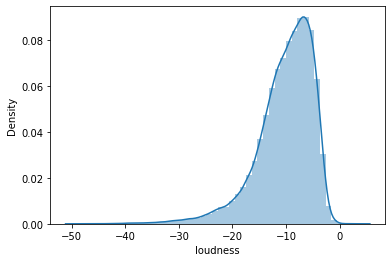

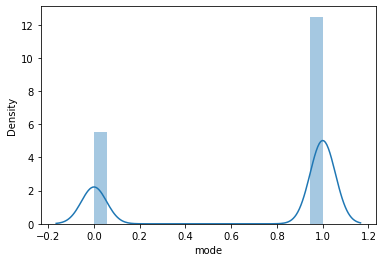

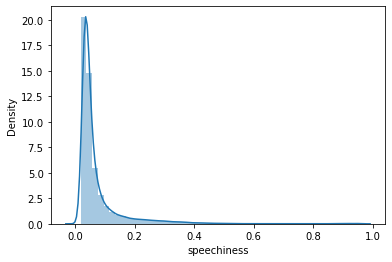

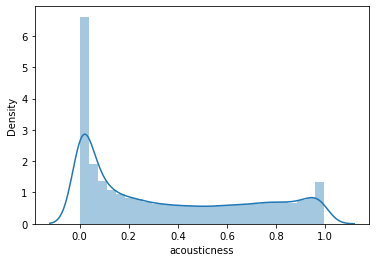

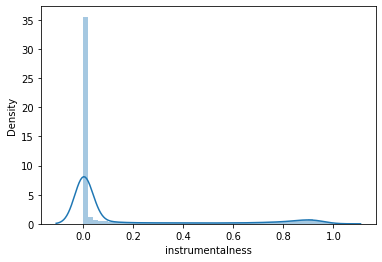

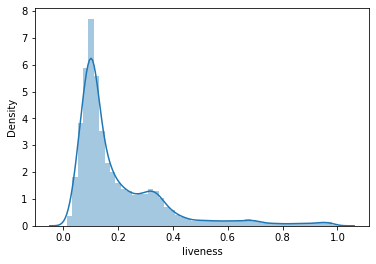

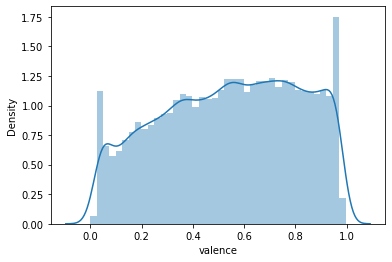

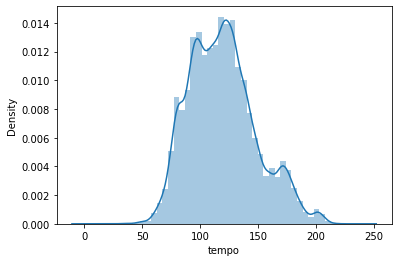

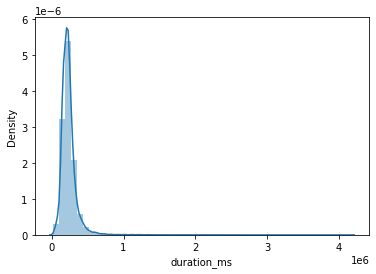

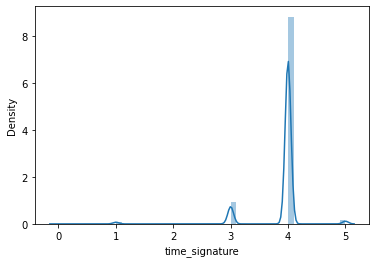

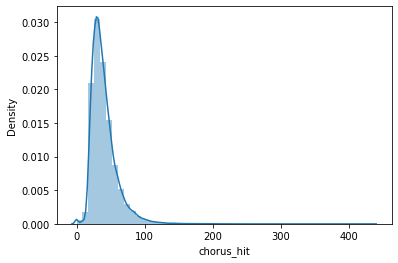

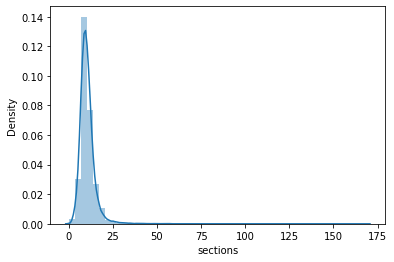

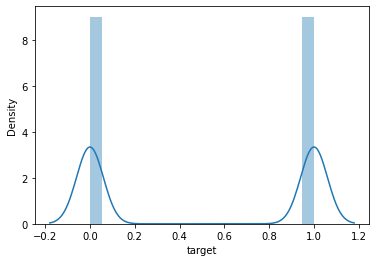

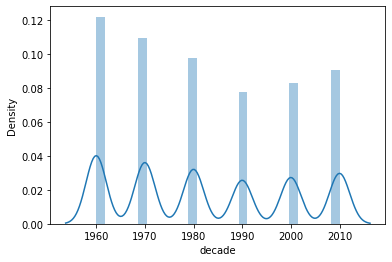

In [8]:
#checking distribution of numeric features
for feature in num_cols:
    data = df.copy()
    ax2 = sns.distplot(data[feature])
    plt.show()

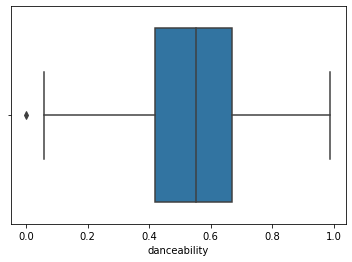

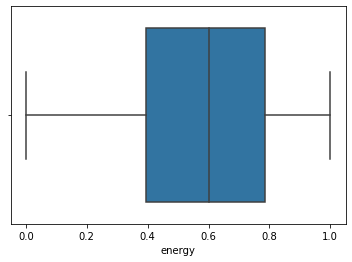

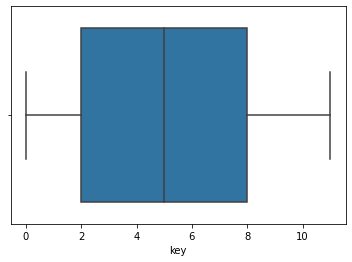

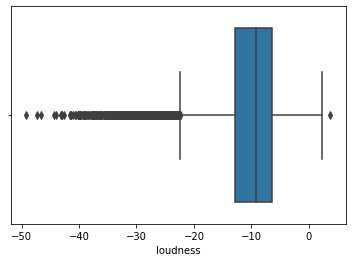

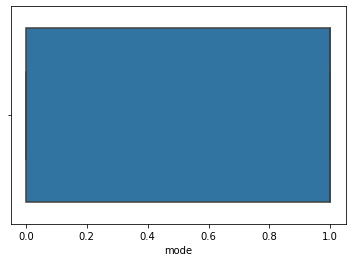

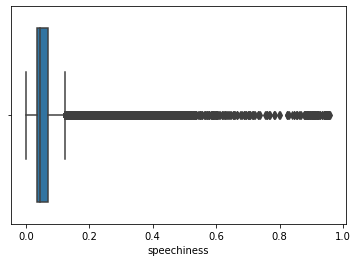

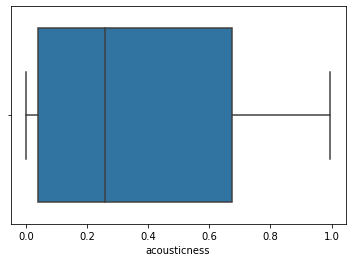

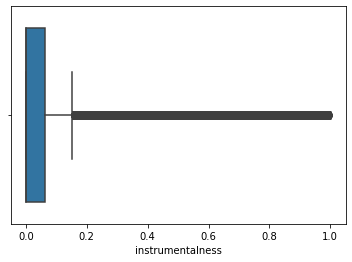

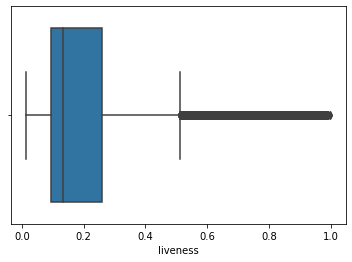

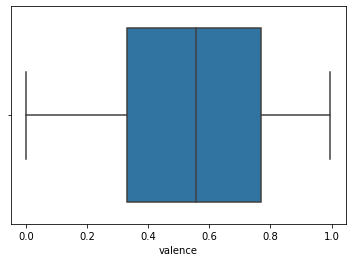

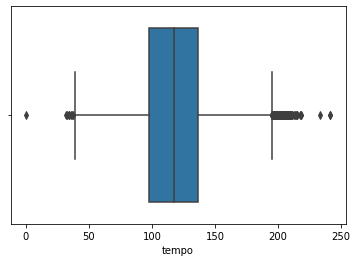

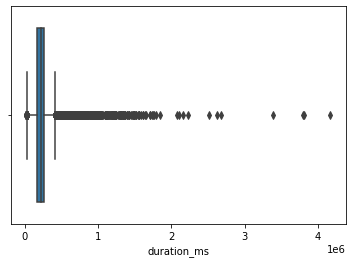

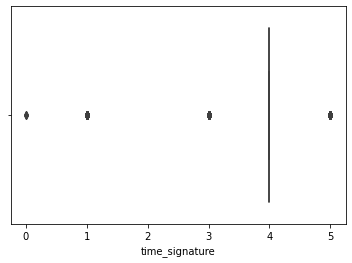

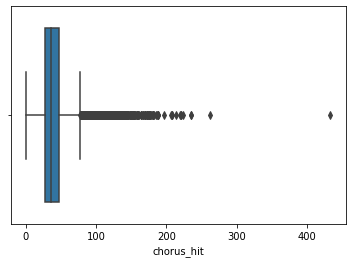

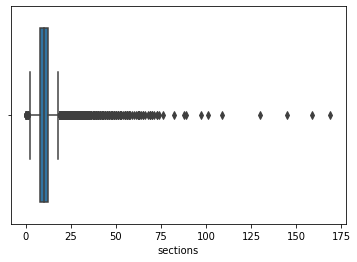

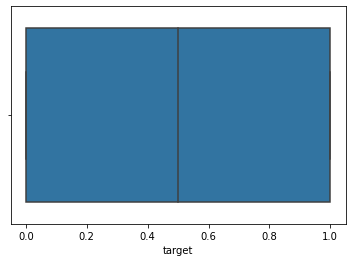

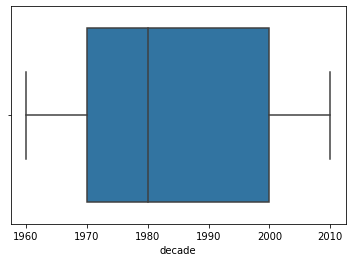

In [9]:
#checking outliers of numeric features
for feature in num_cols:
    data = df.copy()
    ax2 = sns.boxplot(data[feature])
    plt.show()

# Pre-processing data

In [10]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [11]:
def preprocess_inputs(df):
    df = df.copy()
    
    # drop high cardinality columns
    df = df.drop(columns = ['track', 'uri'])
    
    #adding zscore tables - outlier preprocessing
    cols_with_outliers = [ col for col in df.columns if df[col].dtypes != "O" and len(df[col].unique())>50]
    for feature in cols_with_outliers:
        df['zscore'+feature] = ( df[feature] - df[feature].mean() ) /df[feature].std()
    
    #filtering outliers - zscore beetween -3 and 3 std and removing helper columns
    for i in cols_with_outliers:
        df = df.query('zscore'+i + '>-3 and '+'zscore'+i+ '<3')
        df = df.drop(columns = ['zscore'+i])
    
    #convert artist from text to digits
    df['artist'] = LabelEncoder().fit_transform(df.artist)
    
    #Creating X, y
    y =  df['target']
    X = df.drop('target', axis=1)
    
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1)
    
    #scale
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train) , index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test) , index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test


In [12]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)
X_train

,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade
33570,-0.152982,-0.663440,-2.176965,-0.906709,-2.707151,0.656328,-0.433316,1.713068,-0.233868,-0.612482,-0.730922,1.912489,-0.876021,-2.228847,-0.255347,-0.947594,-1.293271
38008,0.594353,-1.404374,1.134179,1.076115,0.750744,0.656328,0.012723,-1.069843,-0.482587,3.253581,-0.768825,0.771801,-0.665875,0.244152,-0.912913,-0.353527,-0.143741
31304,0.432658,0.731600,0.679081,-0.906709,1.371464,-1.523628,-0.120901,-0.344811,-0.489327,-0.758106,0.921617,1.984795,-0.302703,0.244152,-0.161275,-1.244627,1.580554
1609,0.527006,-0.536092,1.322778,-0.906709,1.009977,0.656328,-0.132193,-1.069332,-0.488594,1.383382,-0.962126,-0.480130,0.408493,0.244152,-0.364330,-0.650560,1.005789
37831,-0.488786,0.193265,0.232183,-0.906709,-0.486773,0.656328,-0.606462,-1.010914,-0.489481,0.052806,0.061235,0.374752,-0.326248,0.244152,-0.859902,-0.056493,-0.143741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,-0.589341,0.164322,-2.059705,0.792855,-1.786645,-1.523628,0.987610,1.920661,0.305684,-0.302014,-0.025940,0.906723,-1.655671,0.244152,-1.281590,-1.244627,-1.293271
35799,0.387036,-0.460841,-0.485313,-0.340188,0.273703,-1.523628,-0.314749,1.186564,-0.489481,0.407627,-0.598264,-1.688120,-0.816297,0.244152,-0.622275,-0.353527,-1.293271
5703,-1.257535,0.569521,-0.268014,1.642636,0.368544,0.656328,0.268678,-0.784668,-0.488112,1.132051,0.080187,0.408227,-0.015539,0.244152,0.393107,0.240540,-0.143741
13365,-0.235226,-0.634497,-0.805112,-0.623448,0.564331,0.656328,-0.154777,1.529544,-0.482144,-0.605089,-0.874951,2.079300,-1.328627,-2.228847,-1.023487,-0.650560,-1.293271


# Importing models and training

In [13]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes Gaussian": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train,y_train)
    print(name + " Completed!")

Logistic Regression Completed!
K-Nearest Neighbors Completed!
Decision Tree Completed!
Support Vector Machine Completed!
Random Forest Completed!
Naive Bayes Gaussian Completed!


# Model Scores

In [15]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Logistic Regression: 73.29%
K-Nearest Neighbors: 74.82%
Decision Tree: 71.11%
Support Vector Machine: 79.40%
Random Forest: 80.40%
Naive Bayes Gaussian: 70.97%
